In [1]:
import pandas as pd

df = pd.read_csv('/content/breast-cancer.csv')


In [2]:
df.drop(['id'], axis=1, inplace=True)


In [3]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [4]:
print(df.isnull().sum())


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
X = pd.DataFrame(scaled_features, columns=features.columns)
y = df['diagnosis']


**EDA**

**Class distribution**

Text(0.5, 1.0, 'Class Distribution: Benign(0) vs Malignant(1)')

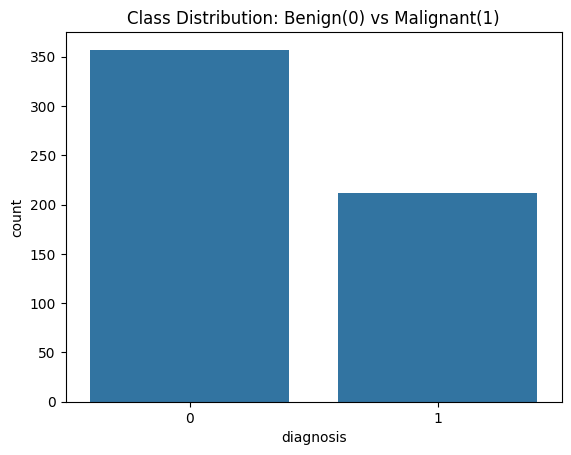

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution: Benign(0) vs Malignant(1)')


**Feature correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

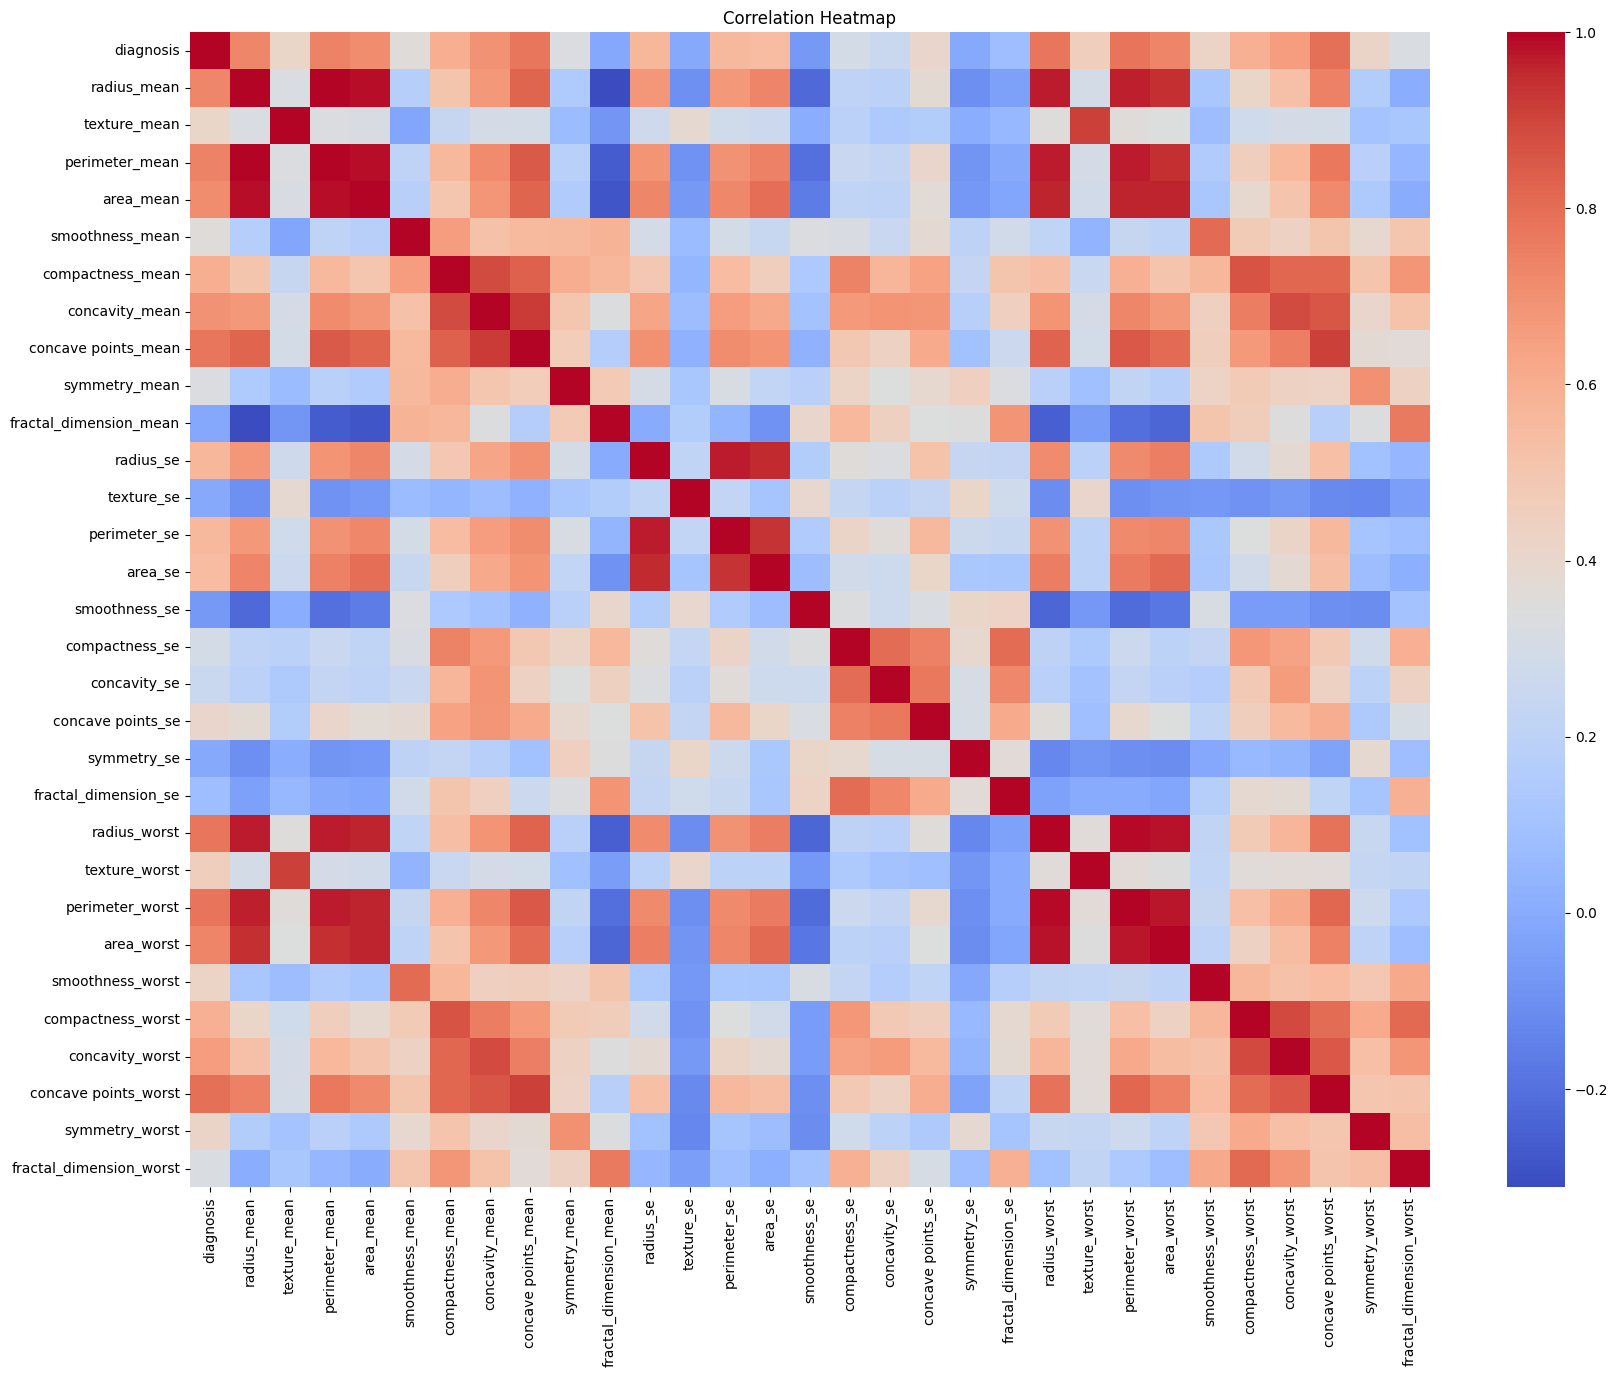

In [7]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')


**Train-test split**

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**Train model**

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [10]:
y_pred = model.predict(X_test)


**Accuracy and F1-Score**

In [11]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9649122807017544
F1 Score: 0.9512195121951219


**Confusion Matrix**

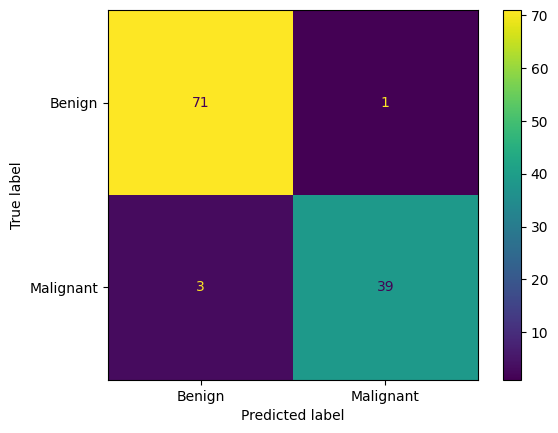

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot()
plt.show()


**ROC Curve**

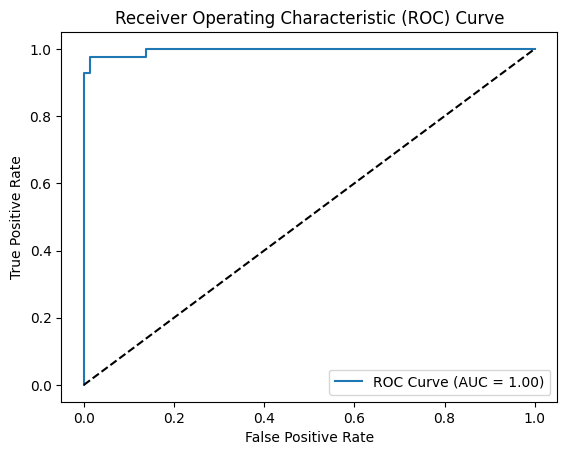

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**Extract and visualize coefficients**

Text(0.5, 0, 'Coefficient Value')

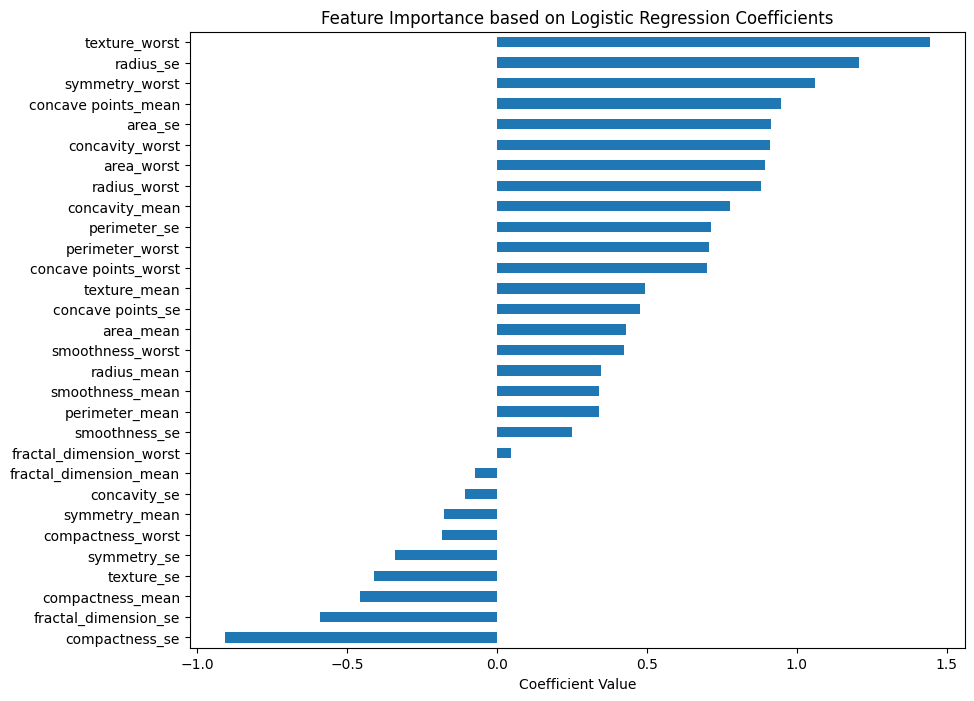

In [14]:
import numpy as np

coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance based on Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
